In [ ]:
from torch.utils.data import DataLoader,Dataset
import torch
import torchvision.transforms as transforms
from torchvision import datasets
import torchvision.models as models
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
train_data = datasets.MNIST(root='./data',train=True,download=True,transform=torchvision.transforms.ToTensor())
test_data = datasets.MNIST(root='./data',train=False,download=True,transform=torchvision.transforms.ToTensor())
train_loader = DataLoader(train_data,batch_size=64,shuffle=True)
test_loader = DataLoader(test_data,batch_size=64,shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 346kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.96MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        self.flatten = torch.nn.Flatten()
        self.unflatten = torch.nn.Unflatten(1,(1,28,28))
        self.fc1 = torch.nn.Linear(784,256)
        self.fc2 = torch.nn.Linear(256,256)
        self.fc3 = torch.nn.Linear(256,256)
        self.fc4 = torch.nn.Linear(256,128)
        self.fc5 = torch.nn.Linear(128,256)
        self.fc6 = torch.nn.Linear(256,256)
        self.fc7 = torch.nn.Linear(256,256)
        self.fc8 = torch.nn.Linear(256,784)

    def forward(self,x):
        x = self.encode(x)
        x = self.decode(x)
        return x
    def encode(self,x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        return x
    def decode(self,x):
        x = self.relu(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.fc6(x)
        x = self.relu(x)
        x = self.fc7(x)
        x = self.relu(x)
        x = self.fc8(x)
        x = self.sigmoid(x)
        x = self.unflatten(x)
        return x

In [ ]:
model = Autoencoder().to(device)
epochs = 10
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = torch.nn.MSELoss()

In [ ]:
for epoch in range(epochs):
    for data in tqdm(train_loader):
        img,label = data
        img = img.to(device)
        output = model(img)
        loss = criterion(output,img)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f'epoch: {epoch}, loss: {loss.item()}')

100%|██████████| 938/938 [00:10<00:00, 90.02it/s] 


epoch: 0, loss: 0.03164757788181305


100%|██████████| 938/938 [00:09<00:00, 100.77it/s]


epoch: 1, loss: 0.0209555234760046


100%|██████████| 938/938 [00:09<00:00, 99.43it/s] 


epoch: 2, loss: 0.028166867792606354


100%|██████████| 938/938 [00:09<00:00, 96.09it/s] 


epoch: 3, loss: 0.017851075157523155


100%|██████████| 938/938 [00:09<00:00, 96.19it/s] 


epoch: 4, loss: 0.01777394488453865


100%|██████████| 938/938 [00:09<00:00, 96.31it/s]


epoch: 5, loss: 0.012996235862374306


100%|██████████| 938/938 [00:08<00:00, 104.27it/s]


epoch: 6, loss: 0.013225656934082508


100%|██████████| 938/938 [00:09<00:00, 96.37it/s] 


epoch: 7, loss: 0.012355434708297253


100%|██████████| 938/938 [00:09<00:00, 95.67it/s] 


epoch: 8, loss: 0.011630702763795853


100%|██████████| 938/938 [00:09<00:00, 95.61it/s] 

epoch: 9, loss: 0.01484812144190073


(64, 1, 28, 28)


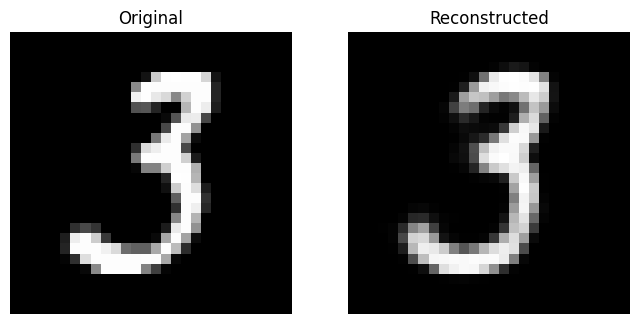

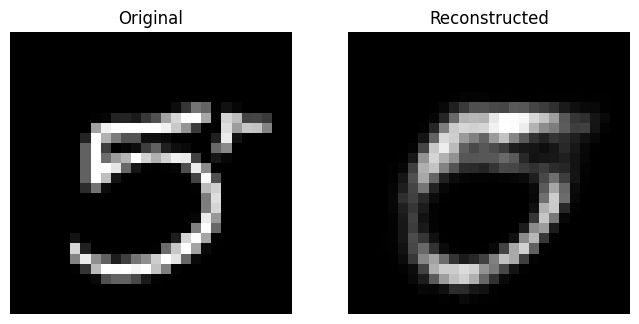

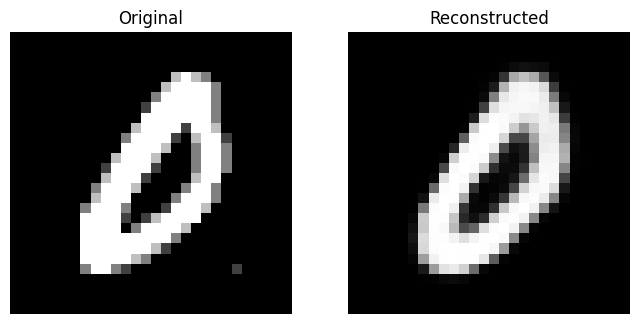

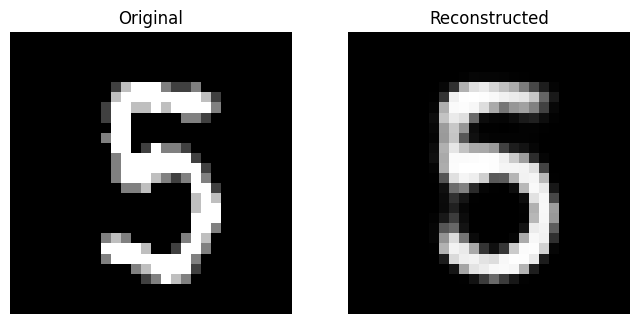

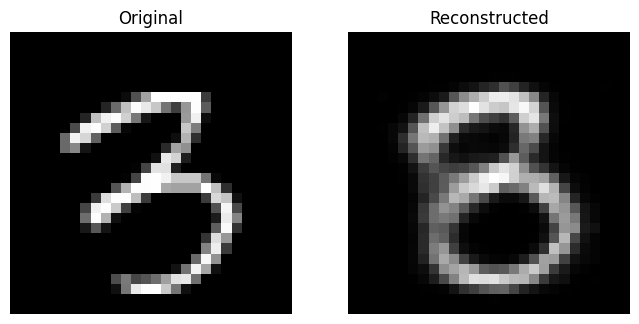

In [ ]:
data_iter = iter(train_loader)
images,labels = next(data_iter)

with torch.no_grad():
    output = model(images.to(device))
    output = output.cpu()
    output = output.numpy()
    print(output.shape)
    output = np.reshape(output,(64,28,28))



for j in range(5):
    image = images[j].numpy()
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(image[0], cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    axes[1].imshow(output[j], cmap='gray')
    axes[1].set_title('Reconstructed')
    axes[1].axis('off')
    plt.show()